# k-means 알고리즘으로 붓꽃 품종 구분하기

In [138]:
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [139]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [140]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [141]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [142]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal length (cm)'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

# silhouette 계수 측정

In [143]:
score_samples = silhouette_samples(iris.data, iris_df["cluster"])
iris_df['silhouette_coeff']=score_samples

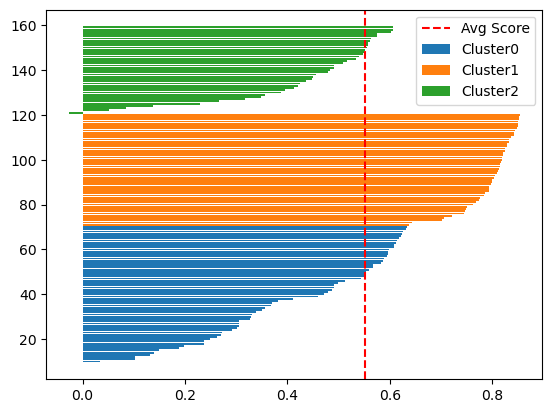

In [144]:
y_lower=10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

## scree plot

In [145]:
KM.inertia_

78.85566582597728

In [146]:
scree_df = iris_df[iris.feature_names]
scree_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

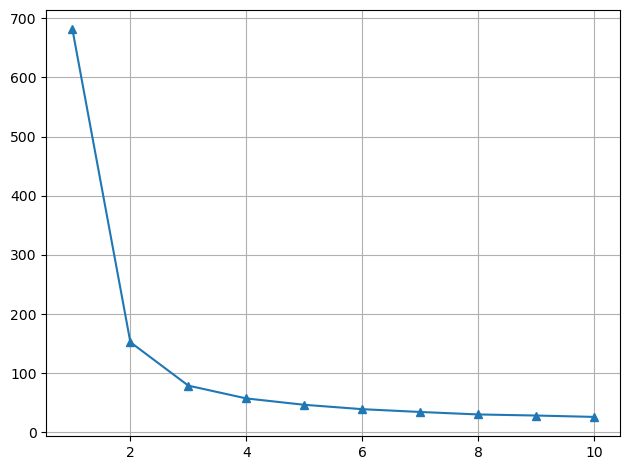

In [147]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='^')
plt.grid()
plt.tight_layout()
plt.show()

## 차원 축소

In [148]:
iris.data.shape

(150, 4)

In [149]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [150]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


### PCA 결과 시각화

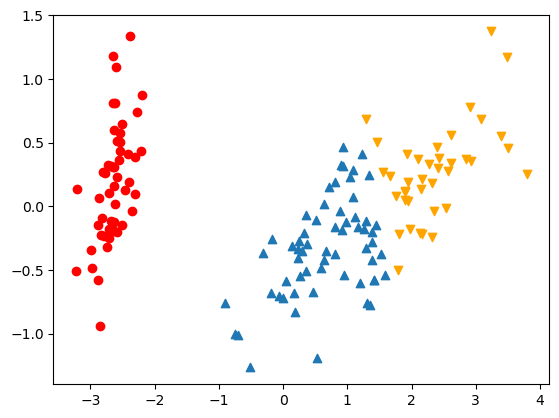

In [151]:
plt.scatter(
    x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
    y=iris_df.loc[iris_df['cluster']==0, 'pca_y'],
    marker='^'
)
plt.scatter(
    x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
    y=iris_df.loc[iris_df['cluster']==1, 'pca_y'],
    marker='o',
    color='red'
)
plt.scatter(
    x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
    y=iris_df.loc[iris_df['cluster']==2, 'pca_y'],
    marker='v',
    color='orange'
)
plt.show()
    

### standardScaler 로 스캐일링
### PCA 2개로 축소
### 시각화

In [152]:
iris_df.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,silhouette_coeff,pca_x
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,0.424561,1.944110
146,6.3,2.5,5.0,1.9,2,0,0.103125,1.527167
147,6.5,3.0,5.2,2.0,2,2,0.316810,1.764346
148,6.2,3.4,5.4,2.3,2,2,0.347855,1.900942


In [153]:
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.35832938, -1.30971087],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.18857506, -1.32435711],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487,
         0.18259934,  1.25113184, -1.40967409]])

In [154]:
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,silhouette_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-3.152120,0.710720
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.970722,-0.083819
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-3.230879,0.139873
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-3.116799,-0.053567
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-3.245118,0.811202


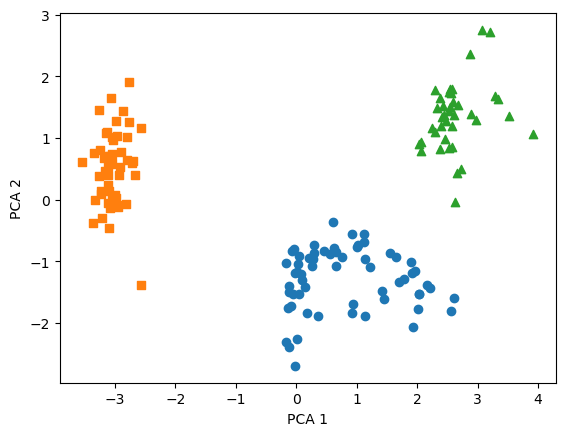

In [155]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 클러스터링 실습

In [156]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
...
  163-171.

|details-end|

In [157]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [158]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [159]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [160]:
# for col in cancer_df.columns:
#     plt.boxplot(cancer_df[col])
#     plt.title(col)
#     plt.show()

### 이상치 판단결과
radius error : t2   
texture error: t1   
parameter error: t2   
area error: t2   
smoothness error: t1   
compactness error: t1   
concavity error: t2   
concavepoint error: t1   
symmetry error: t1   
fractal dimension error: t4   
worst fractal error: t2   

이상치를 제거하려고 보니 유방암 판단의 요소 중 이상치가 있을 수 있으니 제거 X

In [161]:
# df = df.drop("radius error", axis=1, index=df[df["radius error"] == max(df["radius error"])].index)

In [162]:
KM = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
KM.fit(cancer_df)
cancer_df['target'] = cancer.target
cancer_df['cluster'] = KM.labels_
cancer_df.head(2)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1


In [163]:
score_samples = silhouette_samples(cancer.data, cancer_df["cluster"])
cancer_df['silhouette_coeff']=score_samples

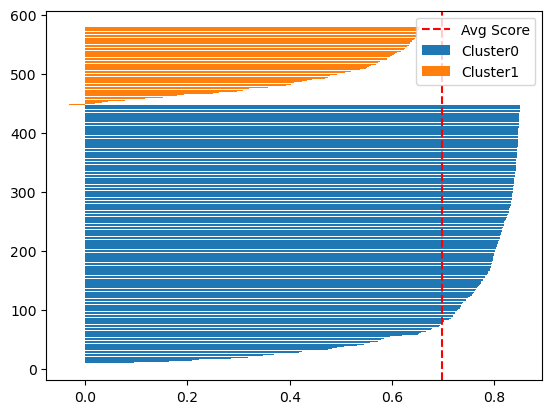

In [164]:
y_lower=10
for i in range(2):
    cluster_i = score_samples[cancer_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper

avg_score = silhouette_score(cancer.data, cancer_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

---------

In [165]:
scree_df = cancer_df[cancer.feature_names]
scree_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

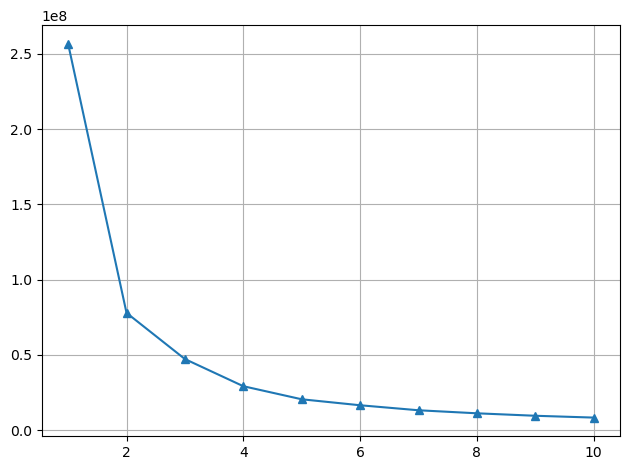

In [166]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='^')
plt.grid()
plt.tight_layout()
plt.show()

-----------

In [167]:
pca = PCA(n_components=2)
cancer_pca_trans = pca.fit_transform(cancer.data)
cancer_df['pca_x'] = cancer_pca_trans[:, 0]
cancer_df['pca_y'] = cancer_pca_trans[:, 1]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouette_coeff,pca_x,pca_y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,0,1,0.590823,1160.142574,-293.917544
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,0.645064,1269.122443,15.630182
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,0,1,0.648506,995.793889,39.156743
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,0.837445,-407.180803,-67.380320
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,0,1,0.605096,930.341180,189.340742


In [168]:
KM = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
KM.fit(cancer_df)
cancer_df['target'] = cancer.target
cancer_df['cluster'] = KM.labels_

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


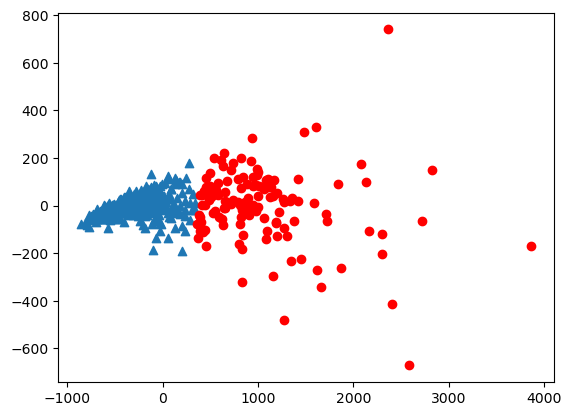

In [169]:
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster']==0, 'pca_x'],
    y=cancer_df.loc[cancer_df['cluster']==0, 'pca_y'],
    marker='^'
)
plt.scatter(
    x=cancer_df.loc[cancer_df['cluster']==1, 'pca_x'],
    y=cancer_df.loc[cancer_df['cluster']==1, 'pca_y'],
    marker='o',
    color='red'
)
plt.show()
    

In [170]:
scaler = StandardScaler()

cancer_scaled = StandardScaler().fit_transform(cancer_df.iloc[:,:-1])
# cancer_scaled[:3]

In [171]:
pca_transformed_scaled = PCA(n_components=2).fit_transform(cancer_scaled)
pca_transformed_scaled

array([[ 9.39017485,  2.73961448],
       [ 3.54739245, -3.87438273],
       [ 6.33019976, -0.65589528],
       ...,
       [ 2.00580019, -1.91502125],
       [10.43442789,  2.72716653],
       [-5.52837032, -1.2258068 ]], shape=(569, 2))

In [172]:
pca_transformed_scaled = PCA(n_components=2).fit_transform(cancer_scaled)
#주성분1, 주성분2
cancer_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
cancer_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concave points,worst symmetry,worst fractal dimension,target,cluster,silhouette_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.2654,0.4601,0.11890,0,1,0.590823,1160.142574,-293.917544,9.390175,2.739614
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1860,0.2750,0.08902,0,1,0.645064,1269.122443,15.630182,3.547392,-3.874383
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.2430,0.3613,0.08758,0,1,0.648506,995.793889,39.156743,6.330200,-0.655895
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2575,0.6638,0.17300,0,0,0.837445,-407.180803,-67.380320,5.756179,11.179834
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1625,0.2364,0.07678,0,1,0.605096,930.341180,189.340742,4.748293,-1.797889


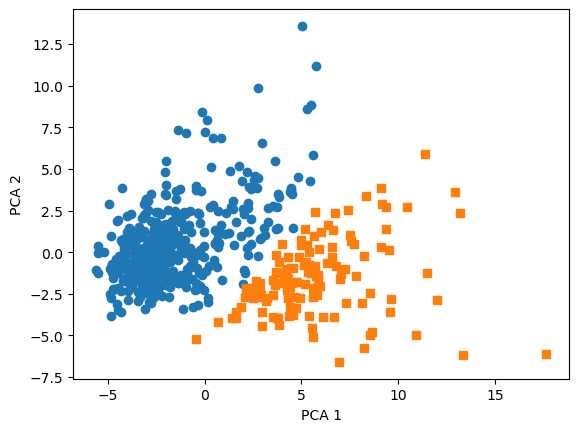

In [173]:
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==0, 'pca_scaled_x'], y=cancer_df.loc[cancer_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==1, 'pca_scaled_x'], y=cancer_df.loc[cancer_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()